## DTSC-691 Capstone: Applied Data Science

## Machine Learning Models for Early Sepsis Detection

# Oliver Imhans

# Goals of the project

**Background**

Sepsis is a potentially life-threatening condition that occurs when the body's response to an infection damages its tissues. When the infection-fighting processes turn on the body, they cause organs to function poorly and abnormally. Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can lead to severe organ problems and death. Early treatment with antibiotics and intravenous fluids improves chances of survival (Mayo Clinic).

Neonatal sepsis, on the other hand, is associated with the most cases of mortalities and morbidities in the neonatal intensive care unit (NICU). Neonatal sepsis is a form of a blood infection that affects neonates under 28 days of age. Neonatal sepsis is classified into two classes: early-onset sepsis (EOS) and late-onset sepsis (LOS). Early-onset sepsis corresponds to infants at or before 72 hours of birth, while late-onset sepsis corresponds to infants affected by neonatal sepsis after the 72-hour mark (Singh et al., 2020).

As sepsis worsens, blood flow to vital organs, such as the brain, heart, and kidneys, becomes impaired. Sepsis may cause abnormal blood clotting that results in small clots or burst blood vessels that damage or destroy tissues. Most people recover from mild sepsis, but the mortality rate for septic shock is about 40%. Also, an episode of severe sepsis places the victim at higher risk of future infections.

# General Analytics

The objective of this project is to use machine learning techniques to develop models that are capable of recognizing infant sepsis at the earliest possible time. These models will be trained as classification and regression models to differentiate input data from control data and detect sepsis as either “sepsis negative” or “sepsis positive”: This will be achieved through an intensive approach to Machine Learning and Deep Learning process.

i. XGBoost classifier

ii. Artificial Neural Network

iii. Logistic Regression

iv. KNeighborsClassifier

v. Support Vector Machine Classifiers

vi. DecisionTreeClassifier

vii. RandomForestClassifier

Which will then be followed by some more analysis to verify the outcomes and results.

# Research Topic

A recent resolution by the United Nations World Health Assembly recognized that sepsis is a main contributor to global morbidity and mortality and requested for improved prevention, recognition, diagnosis, and management of sepsis across all age groups for the next decade. In addition, the World Health Organization (WHO) has recently defined the need to improve the burden of neonatal sepsis as one of the Sustainable Development Goals. As more data becomes available it is imperative for analysts to figure out how best to use this data to detect the early stages of Neonatal sepsis, that is the primary reason for me as a data scientist to use my knowledge to develop machine learning models for early sepsis detection. These models will be capable after training to detect infant sepsis at the early stage as either positive or negative.

# Implementation Strategy

To make this project successful, I will follow standard practice in data mining and carry out this project in python. In today's world, python is a general-purpose programming language that is becoming ever more popular for analyzing data. It allows quick workflow and integrates systems more effectively. The first part of this project will be the installation of libraries that will make the program work, some of which are Pandas, NumPy, TensorFlow, and others. After the installation is completed, then I will import them into the code editor which will be the Jupyter Notebook and Google Colab. The other processes are as follows:

i. Read data into the code editor.

ii. Data processing and exploration

iii. Carry out data wrangling

iv. Carry out data Visualization.

v. Feature selection

vi. Machine learning models

vii. Predictions and analysis.

viii. Finally, I am going to use joblib to save my model and deploy them through Flask.



# Implementation Strategy 

To make this project successful, I will follow standard practice in data mining and carry out this project in python. In today's world, python is a general-purpose programming language that is becoming ever more popular for analyzing data. It allows quick workflow and integrates systems more effectively. The first part of this project will be the installation of libraries that will make the program work, some of which are Pandas, NumPy, TensorFlow, and others. After the installation is completed, then I will import them into the code editor.

**The order processes are as follows:**

i. Read data into the code editor.

ii. Data processing and exploration

iii. Carry out data wrangling

iv. Carry out data Visualization.

v. Feature selection

vi. Machine learning models

vii. Predictions and analysis.

viii. Finally, I am going to use joblib to save my model and deploy them through Flask. 

# Importing some of the needed libraries

In [1]:
# importing the needed packages
import warnings  # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import sys  # This module gives access to system-specific parameters and functions
import os   # The OS module provides functions for interacting with the operating system

import statsmodels.api as sm
import statsmodels.formula.api as smf



import sklearn
from sklearn.model_selection import train_test_split  # importing the train_test_split() function
from sklearn.preprocessing import LabelEncoder # Module to normalize labels.
from sklearn.neighbors import KNeighborsClassifier # This classifier implements learning based on the k nearest neighbors.
from sklearn.metrics import accuracy_score  #  This function computes subset accuracy
import sklearn.metrics as metrics # importing metric functions
from sklearn.metrics import mean_squared_error # estimates the mean squared error for the desired loss unit.
from sklearn.metrics import f1_score # measures test's accuracy
from sklearn.metrics import precision_score # classifier not to label as positive a sample that is negative 
from sklearn.metrics import recall_score  # measures model’s ability to correctly predict the positives out of actual positives
from sklearn.metrics import confusion_matrix # matrix to evaluate the accuracy of a classification.
from sklearn import model_selection
from sklearn.metrics import classification_report

# Data importation

The dataset is a fully de-identified cohort of 1946 sepsis, and it is available at https://data.mendeley.com/datasets/5vdz5cftz7/1. 


In [2]:
# Reading in data into a dataframe 
data = pd.read_csv('sepsis.csv')

#pd.set_option("display.max_columns", None): used to view the entire column of the dataset.

# Display top of dataframe
data.head()


,episode_id,unique_patient_id,sex,race,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,...,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt,period
0,1,1,0,3,23.0,0.40,1,7,9,1,...,1,0,37.6,216.0,0,0,0,0,1,Year 1
1,2,2,0,5,27.0,0.79,3,0,4,0,...,1,0,36.8,578.0,0,0,0,0,0,Year 1
2,3,2,0,5,27.0,0.79,1,23,9,1,...,0,0,36.9,578.0,0,0,0,0,0,Year 1
3,4,3,0,5,37.0,4.31,1,11,22,1,...,1,0,37.2,285.0,0,0,0,0,0,Year 1
4,5,4,1,5,39.0,4.17,2,3,17,0,...,1,0,36.2,783.0,0,0,0,0,0,Year 1


# Data Preprocessing and Exploration

About 986 infants' data were collected between September 2014 and February 2018. 

This data comprises of one thousand nine hundred and forty-six rows, and thirty-two columns 



In [3]:
# Viewing the shape of the data.
data.shape

(1946, 32)

In [4]:
# Checking the data to have an insight of the features and target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   episode_id                              1946 non-null   int64  
 1   unique_patient_id                       1946 non-null   int64  
 2   sex                                     1946 non-null   int64  
 3   race                                    1946 non-null   object 
 4   gestational_age_at_birth_weeks          1931 non-null   float64
 5   birth_weight_kg                         1894 non-null   float64
 6   sepsis_group                            1946 non-null   int64  
 7   onset_age_in_days                       1946 non-null   int64  
 8   onset_hour_of_day                       1946 non-null   int64  
 9   blood_culture_positive                  1946 non-null   int64  
 10  positive_days                           1946 non-null   int6

**The race and period are the only object in the data set.**

In [5]:
print(data.columns.tolist())

['episode_id', 'unique_patient_id', 'sex', 'race', 'gestational_age_at_birth_weeks', 'birth_weight_kg', 'sepsis_group', 'onset_age_in_days', 'onset_hour_of_day', 'blood_culture_positive', 'positive_days', 'cx_site', 'time_to_antibiotics', 'stat_abx', 'overall_mortality_within_7_days', 'overall_mortality_within_14_days', 'overall_mortality_within_30_days', 'intubated_at_time_of_sepsis_evaluation', 'intubated_free_days', 'inotrope_at_time_of_sepsis_eval', 'inotrope_free_days', 'central_venous_line', 'umbilical_arterial_line', 'ecmo', 'temp_celsius', 'length_of_stay_hours', 'comorbidity_necrotizing_enterocolitis', 'comorbidity_chronic_lung_disease', 'comorbidity_cardiac', 'comorbidity_surgical', 'comorbidity_ivh_or_shunt', 'period']


In [6]:
# Checking the data for missing values with the function.
def missing_values_table(mv):
        # Total missing values
        mis_val = mv.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mv.isnull().sum() / len(mv)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(mv.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Viewing the missing values table
missing_values_table(data)

Dataframe has 32 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
cx_site,1752,90.0
length_of_stay_hours,108,5.5
birth_weight_kg,52,2.7
gestational_age_at_birth_weeks,15,0.8
temp_celsius,4,0.2


In [8]:
# Viewing the distribution of columns.
with pd.option_context('display.max_rows', None):
    for col in data:
        print(col, len(data[col].value_counts()))

episode_id 1946
unique_patient_id 986
sex 2
race 7
gestational_age_at_birth_weeks 20
birth_weight_kg 230
sepsis_group 6
onset_age_in_days 268
onset_hour_of_day 24
blood_culture_positive 2
positive_days 8
cx_site 4
time_to_antibiotics 255
stat_abx 2
overall_mortality_within_7_days 2
overall_mortality_within_14_days 2
overall_mortality_within_30_days 2
intubated_at_time_of_sepsis_evaluation 2
intubated_free_days 29
inotrope_at_time_of_sepsis_eval 2
inotrope_free_days 26
central_venous_line 2
umbilical_arterial_line 2
ecmo 2
temp_celsius 50
length_of_stay_hours 836
comorbidity_necrotizing_enterocolitis 2
comorbidity_chronic_lung_disease 2
comorbidity_cardiac 2
comorbidity_surgical 2
comorbidity_ivh_or_shunt 2
period 4


# Data Wrangling

In [9]:
# 90% of this column has missing data.
data.drop('cx_site', axis='columns', inplace=True) 

In [10]:
# using Label encoder to transform the objects in the dataset. 
encoder = LabelEncoder()
data['race'] = encoder.fit_transform(data['race'])
data['period'] = encoder.fit_transform(data['period']) 

**Missing Values**

The cx_site columns with 1752 values and 90 percent missing values was dropped.

The remaining columons, 

i. length_of_stay_hours	

ii. birth_weight_kg	

iii. gestational_age_at_birth_weeks	

iv. temp_celsius	

will be filled with either the mean or median after viewing the way they are skewed.

In [11]:
data['length_of_stay_hours']

0       216.0
1       578.0
2       578.0
3       285.0
4       783.0
        ...  
1941      NaN
1942      NaN
1943      NaN
1944      NaN
1945      NaN
Name: length_of_stay_hours, Length: 1946, dtype: float64

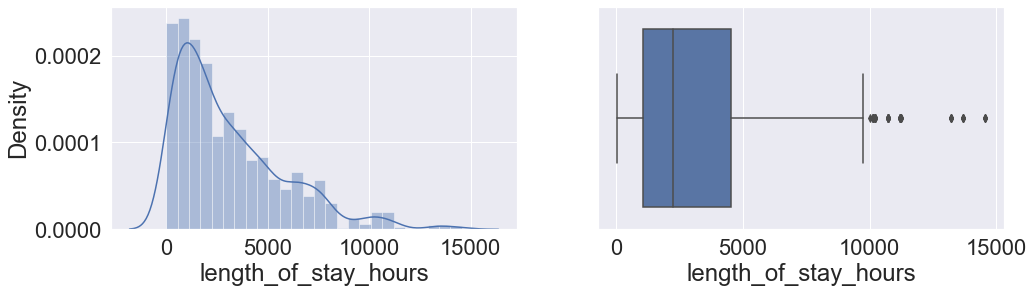

In [12]:
# viewing the columns with missing data.
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['length_of_stay_hours']) 
plt.subplot(2,2,2)
sns.boxplot(data['length_of_stay_hours'])
plt.show()

In [13]:
#  Finding the Interquartile range (IQR)
LOSH = data['length_of_stay_hours'] # LOSH is acronym for length_of_stay_hours
Q1 = data['length_of_stay_hours'].quantile(0.25)
Q3 = data['length_of_stay_hours'].quantile(0.75)

In [14]:
# Computing IQR
iqr = Q3 - Q1
print('The Interquartile range is', iqr)

The Interquartile range is 3475.5


In [15]:
 # Finding upper and lower limit
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print('The lower_limit is', lower_limit)
print('The upper_limit is', upper_limit)

The lower_limit is -4181.5
The upper_limit is 9720.5


In [16]:
# Finding the Outliers
outlier =[]
for x in LOSH:
    if ((x> upper_limit) or (x<lower_limit)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [10029.0, 13685.0, 13685.0, 13685.0, 13685.0, 13685.0, 14567.0, 14567.0, 14567.0, 14567.0, 11230.0, 11230.0, 11230.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10718.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10126.0, 10199.0, 10199.0, 10199.0, 10199.0, 10199.0, 10199.0, 10199.0, 10199.0, 13224.0, 13224.0, 13224.0, 13224.0, 13224.0, 11187.0, 11187.0, 11187.0, 11187.0, 11187.0, 11187.0, 11187.0, 11187.0, 11187.0]


In [17]:
data[data['length_of_stay_hours'] > upper_limit]
data[data['length_of_stay_hours'] < lower_limit]

,episode_id,unique_patient_id,sex,race,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,...,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt,period


In [18]:
# Trimming of Outliers
new_data = data[data['length_of_stay_hours'] < upper_limit]
new_data.shape

(1779, 31)

In [19]:
# Capping on outliers
new_data_cap = data.copy()
new_data_cap['length_of_stay_hours'] = np.where(
    new_data_cap['length_of_stay_hours'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap['length_of_stay_hours'] < lower_limit,
        lower_limit,
        new_data_cap['length_of_stay_hours']
    )
)    

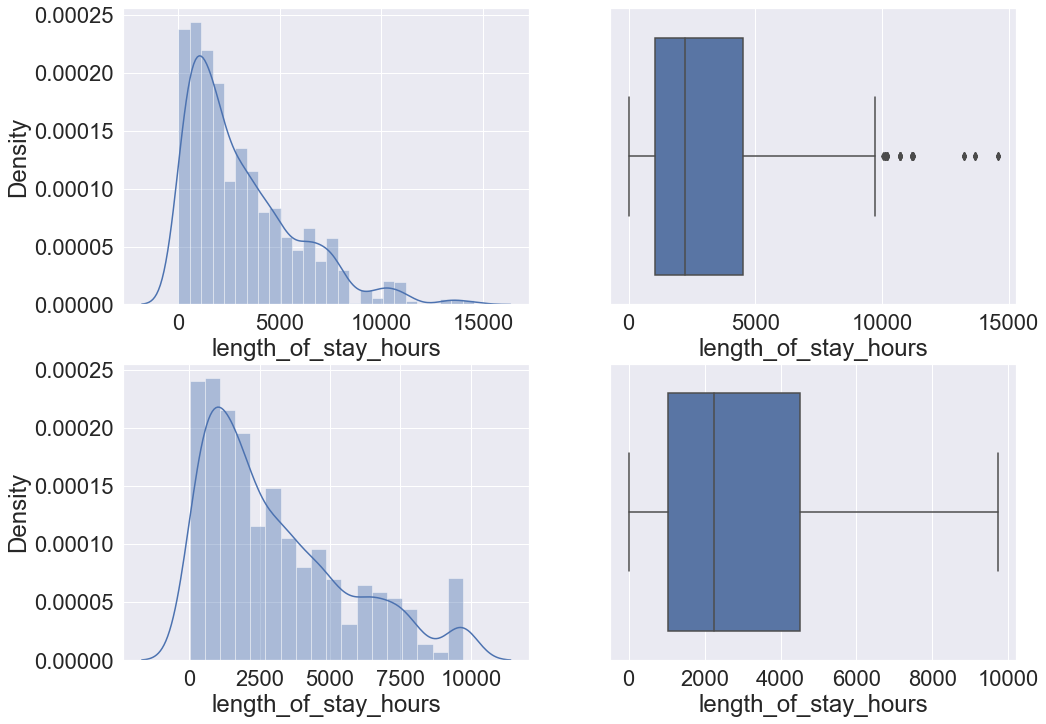

In [20]:
# Compare the plots after capping
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(data['length_of_stay_hours'])
plt.subplot(2,2,2)
sns.boxplot(data['length_of_stay_hours'])
plt.subplot(2,2,3)
sns.distplot(new_data_cap['length_of_stay_hours'])
plt.subplot(2,2,4)
sns.boxplot(new_data_cap['length_of_stay_hours'])
plt.show()

In [21]:
# filling the missing values with the median
new_data_cap['length_of_stay_hours'].fillna(data['length_of_stay_hours'].median(), inplace=True)

In [22]:
new_data_cap['length_of_stay_hours'].describe()

count    1946.000000
mean     3022.250514
std      2481.091822
min         2.000000
25%      1102.500000
50%      2237.500000
75%      4394.000000
max      9720.500000
Name: length_of_stay_hours, dtype: float64

**The same process is carried out for the remaining values with missing data**

In [23]:
data['birth_weight_kg']

0       0.40
1       0.79
2       0.79
3       4.31
4       4.17
        ... 
1941    2.78
1942    2.88
1943    2.56
1944    1.70
1945    0.68
Name: birth_weight_kg, Length: 1946, dtype: float64

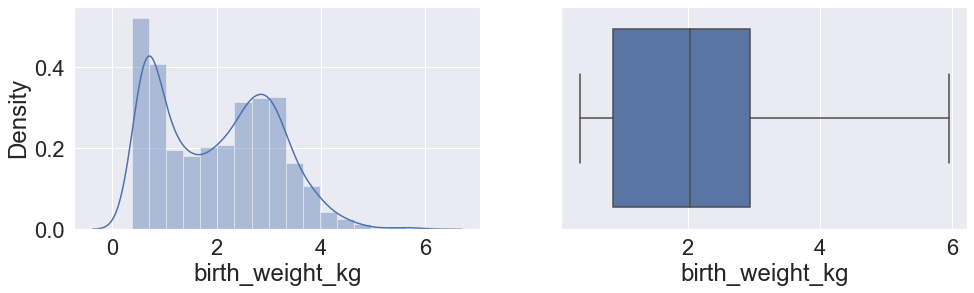

In [24]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['birth_weight_kg']) 
plt.subplot(2,2,2)
sns.boxplot(data['birth_weight_kg'])
plt.show()

In [25]:
# There are no outliers. Fill with the mean
new_data_cap['birth_weight_kg'].fillna(data['birth_weight_kg'].mean(), inplace=True)

In [26]:
new_data_cap['birth_weight_kg'].describe()

count    1946.000000
mean        2.009187
std         1.105925
min         0.370000
25%         0.910000
50%         2.010000
75%         2.920000
max         5.950000
Name: birth_weight_kg, dtype: float64

In [27]:
data['gestational_age_at_birth_weeks']

0       23.0
1       27.0
2       27.0
3       37.0
4       39.0
        ... 
1941    37.0
1942    37.0
1943    38.0
1944    30.0
1945    25.0
Name: gestational_age_at_birth_weeks, Length: 1946, dtype: float64

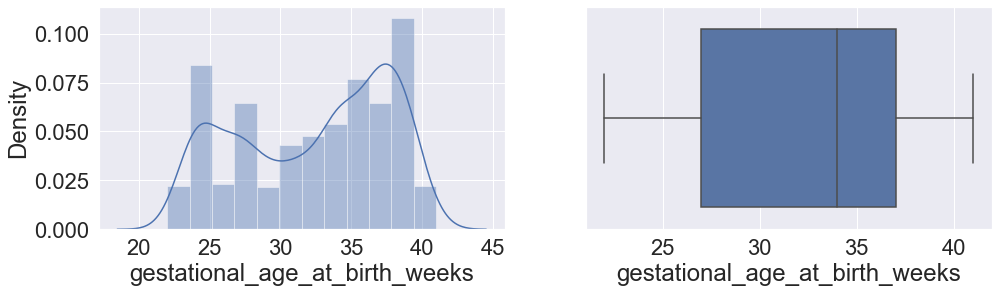

In [28]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['gestational_age_at_birth_weeks']) 
plt.subplot(2,2,2)
sns.boxplot(data['gestational_age_at_birth_weeks'])
plt.show()

In [29]:
# There are no outliers. Fill with the mean
new_data_cap['gestational_age_at_birth_weeks'].fillna(data['gestational_age_at_birth_weeks'].mean(), inplace=True)

In [30]:
new_data_cap['gestational_age_at_birth_weeks'].describe()

count    1946.000000
mean       32.336095
std         5.321194
min        22.000000
25%        27.000000
50%        34.000000
75%        37.000000
max        41.000000
Name: gestational_age_at_birth_weeks, dtype: float64

In [31]:
data['temp_celsius']

0       37.6
1       36.8
2       36.9
3       37.2
4       36.2
        ... 
1941    38.2
1942    37.7
1943    35.9
1944    36.9
1945    37.5
Name: temp_celsius, Length: 1946, dtype: float64

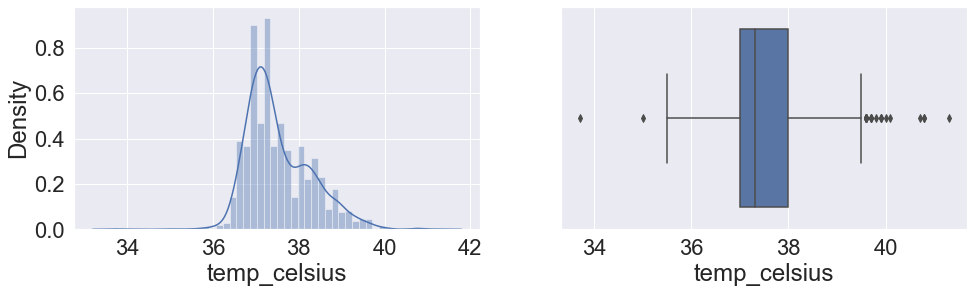

In [32]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['temp_celsius']) 
plt.subplot(2,2,2)
sns.boxplot(data['temp_celsius'])
plt.show()

In [33]:
#  Finding the Interquartile range (IQR)
TC = data['temp_celsius'] # TC is acronym for temp_celsius
Q1 = data['temp_celsius'].quantile(0.25)
Q3 = data['temp_celsius'].quantile(0.75)

In [34]:
# Computing IQR
iqr = Q3 - Q1
print('The Interquartile range is', iqr)

The Interquartile range is 1.0


Since the nterquartile range is one there will be no significant change by removing the outlier, so i will just fill the missing values with the median.

In [35]:
# filling the missing values with the median
new_data_cap['temp_celsius'].fillna(data['temp_celsius'].median(), inplace=True)

In [36]:
# viewing the final outcome. 
missing_data = new_data_cap.isnull().sum()
missing_data

episode_id                                0
unique_patient_id                         0
sex                                       0
race                                      0
gestational_age_at_birth_weeks            0
birth_weight_kg                           0
sepsis_group                              0
onset_age_in_days                         0
onset_hour_of_day                         0
blood_culture_positive                    0
positive_days                             0
time_to_antibiotics                       0
stat_abx                                  0
overall_mortality_within_7_days           0
overall_mortality_within_14_days          0
overall_mortality_within_30_days          0
intubated_at_time_of_sepsis_evaluation    0
intubated_free_days                       0
inotrope_at_time_of_sepsis_eval           0
inotrope_free_days                        0
central_venous_line                       0
umbilical_arterial_line                   0
ecmo                            

In [37]:
new_data_cap.describe().T 

,count,mean,std,min,25%,50%,75%,max
episode_id,1946.0,973.500000,561.906131,1.00,487.25,973.50,1459.75,1946.00
unique_patient_id,1946.0,491.026721,272.736848,1.00,264.00,481.50,730.75,986.00
sex,1946.0,0.576567,0.494230,0.00,0.00,1.00,1.00,1.00
race,1946.0,2.582220,1.742165,0.00,0.00,3.00,4.00,6.00
gestational_age_at_birth_weeks,1946.0,32.336095,5.321194,22.00,27.00,34.00,37.00,41.00
birth_weight_kg,1946.0,2.009187,1.105925,0.37,0.91,2.01,2.92,5.95
sepsis_group,1946.0,2.521583,1.263201,1.00,2.00,2.00,3.00,6.00
onset_age_in_days,1946.0,66.431655,70.165333,0.00,10.00,44.00,105.75,335.00
onset_hour_of_day,1946.0,10.560123,6.533421,0.00,5.00,10.00,16.00,23.00
blood_culture_positive,1946.0,0.065776,0.247954,0.00,0.00,0.00,0.00,1.00


In [38]:
# renaming it back to data 
data_clean = new_data_cap

In [39]:
missing_data = data_clean.isnull().sum()
missing_data

episode_id                                0
unique_patient_id                         0
sex                                       0
race                                      0
gestational_age_at_birth_weeks            0
birth_weight_kg                           0
sepsis_group                              0
onset_age_in_days                         0
onset_hour_of_day                         0
blood_culture_positive                    0
positive_days                             0
time_to_antibiotics                       0
stat_abx                                  0
overall_mortality_within_7_days           0
overall_mortality_within_14_days          0
overall_mortality_within_30_days          0
intubated_at_time_of_sepsis_evaluation    0
intubated_free_days                       0
inotrope_at_time_of_sepsis_eval           0
inotrope_free_days                        0
central_venous_line                       0
umbilical_arterial_line                   0
ecmo                            

In [40]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
episode_id,1946.0,973.500000,561.906131,1.00,487.25,973.50,1459.75,1946.00
unique_patient_id,1946.0,491.026721,272.736848,1.00,264.00,481.50,730.75,986.00
sex,1946.0,0.576567,0.494230,0.00,0.00,1.00,1.00,1.00
race,1946.0,2.582220,1.742165,0.00,0.00,3.00,4.00,6.00
gestational_age_at_birth_weeks,1946.0,32.336095,5.321194,22.00,27.00,34.00,37.00,41.00
birth_weight_kg,1946.0,2.009187,1.105925,0.37,0.91,2.01,2.92,5.95
sepsis_group,1946.0,2.521583,1.263201,1.00,2.00,2.00,3.00,6.00
onset_age_in_days,1946.0,66.431655,70.165333,0.00,10.00,44.00,105.75,335.00
onset_hour_of_day,1946.0,10.560123,6.533421,0.00,5.00,10.00,16.00,23.00
blood_culture_positive,1946.0,0.065776,0.247954,0.00,0.00,0.00,0.00,1.00


In [41]:
# Check for any duplicate values before proceeding further
print(f"The duplicate values in the cleaned data are {data_clean.duplicated().sum()} of {len(data_clean)}, and its percentage is {(100* data_clean.duplicated().sum()/len(data_clean)).round(2)} % of the data.")

The duplicate values in the cleaned data are 0 of 1946, and its percentage is 0.0 % of the data.


# Data Visualization

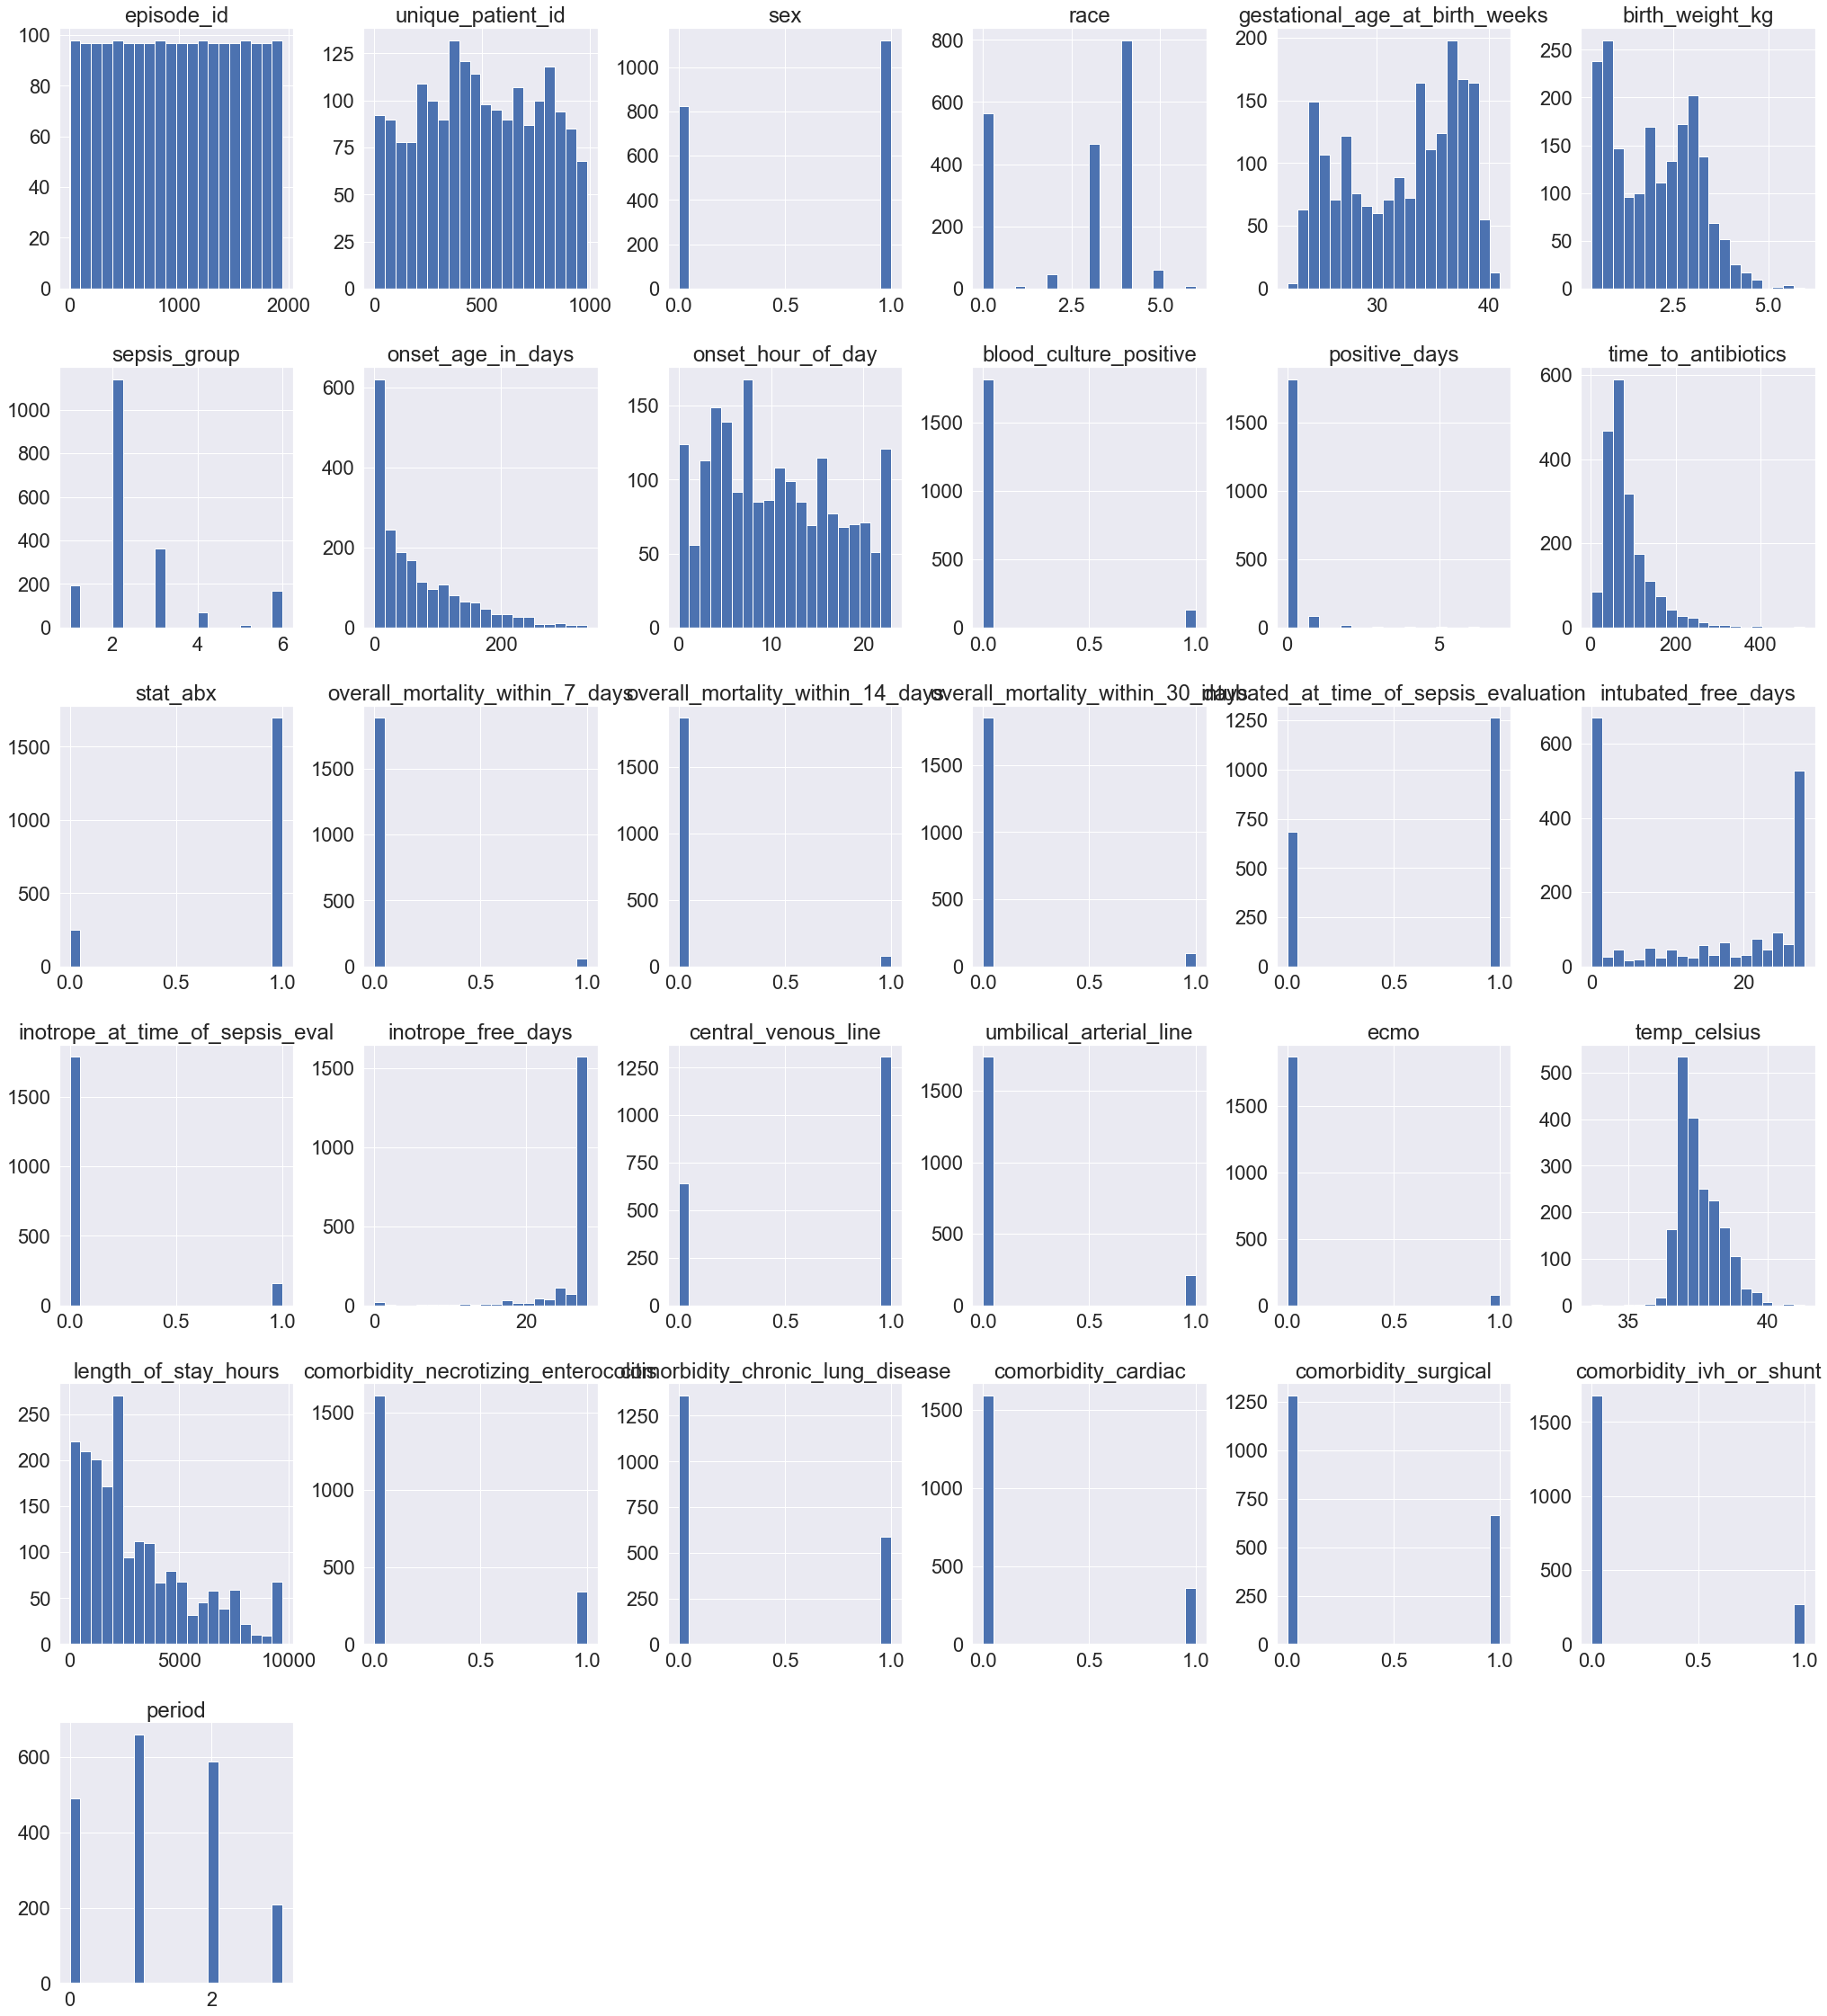

In [42]:
# Plotting the data distribution plots after removing the missing values
data_clean.hist(bins=20, figsize=(35,40))
plt.show() 

In [43]:
# Checking the Corrleation matrix
corr = data_clean.corr()
round(corr,2)

,episode_id,unique_patient_id,sex,race,gestational_age_at_birth_weeks,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,blood_culture_positive,...,umbilical_arterial_line,ecmo,temp_celsius,length_of_stay_hours,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt,period
episode_id,1.00,1.00,0.04,-0.03,0.02,0.03,-0.02,-0.06,0.00,-0.03,...,-0.03,-0.00,0.04,-0.14,-0.02,0.05,-0.02,-0.05,0.01,0.94
unique_patient_id,1.00,1.00,0.04,-0.03,0.03,0.03,-0.02,-0.06,0.00,-0.03,...,-0.03,-0.00,0.04,-0.14,-0.03,0.05,-0.02,-0.05,0.02,0.94
sex,0.04,0.04,1.00,-0.01,0.00,0.06,0.01,-0.07,0.03,-0.02,...,0.01,0.00,-0.03,-0.04,0.02,-0.05,-0.08,0.03,-0.04,0.04
race,-0.03,-0.03,-0.01,1.00,0.02,0.03,0.01,-0.14,0.03,-0.05,...,0.03,0.06,-0.06,-0.08,-0.09,-0.10,0.00,0.02,-0.01,-0.05
gestational_age_at_birth_weeks,0.02,0.03,0.00,0.02,1.00,0.88,-0.05,-0.33,0.04,-0.07,...,0.18,0.18,0.08,-0.25,-0.32,-0.46,0.09,0.42,-0.34,0.01
birth_weight_kg,0.03,0.03,0.06,0.03,0.88,1.00,-0.05,-0.35,0.04,-0.06,...,0.21,0.19,0.04,-0.27,-0.26,-0.43,0.04,0.37,-0.30,0.02
sepsis_group,-0.02,-0.02,0.01,0.01,-0.05,-0.05,1.00,0.06,-0.01,-0.32,...,-0.05,-0.03,0.03,0.03,0.04,0.06,-0.02,-0.03,0.02,-0.02
onset_age_in_days,-0.06,-0.06,-0.07,-0.14,-0.33,-0.35,0.06,1.00,-0.06,0.03,...,-0.31,-0.15,0.41,0.50,0.27,0.62,0.16,-0.23,0.17,0.03
onset_hour_of_day,0.00,0.00,0.03,0.03,0.04,0.04,-0.01,-0.06,1.00,-0.01,...,-0.00,-0.04,-0.03,-0.05,-0.01,-0.04,-0.03,-0.02,-0.04,-0.00
blood_culture_positive,-0.03,-0.03,-0.02,-0.05,-0.07,-0.06,-0.32,0.03,-0.01,1.00,...,-0.02,-0.02,0.09,0.03,0.06,0.01,-0.01,-0.04,0.03,-0.02


In [44]:
data_clean["sepsis_group"]

0       1
1       3
2       1
3       1
4       2
       ..
1941    2
1942    2
1943    2
1944    1
1945    2
Name: sepsis_group, Length: 1946, dtype: int64

**Outcome of sepsis evaluation**

1  positive culture for bacteria from any source, minimum of 5 days (120 hours) of antibiotic treatment 

2  no positive culture, maximum of 72 hours of antibiotic treatment 

3  no positive culture, minimum of 5 days (120 hours) of antibiotic treatment (aka “clinical sepsis”) 

4  positive culture only for viral pathogens (negative for bacterial pathogens) 

5  positive culture only for fungal pathogens (negative for bacterial or viral pathogens) 

6  other (e.g. more than 72 hours but less than 120 hours of antibiotic treatment)

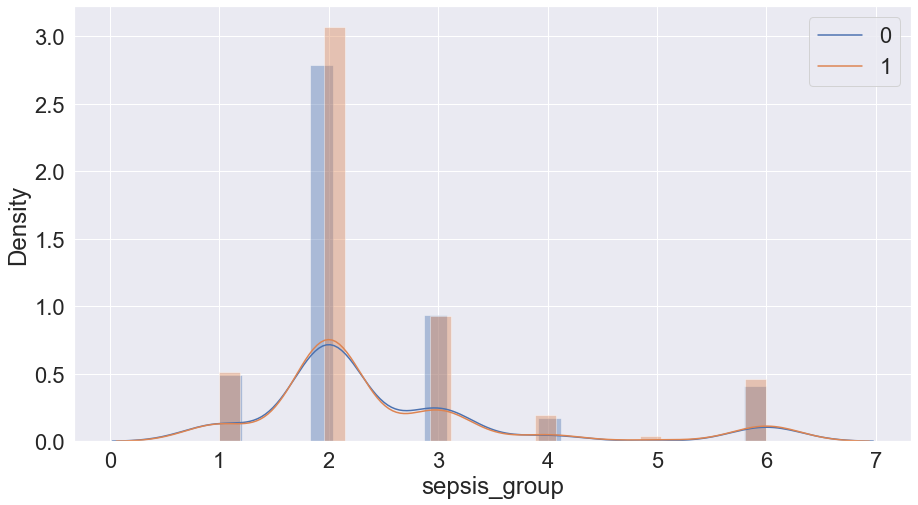

In [45]:
# Taking a look at how Sepsis varies among sex
# 0 is female
# 1 is male
plt.figure(figsize=(15,8))
sns.distplot(data_clean["sepsis_group"][data_clean["sex"]==0])
sns.distplot(data_clean["sepsis_group"][data_clean["sex"]==1])
plt.legend(['0','1'])
plt.show()

**2 is no positive culture, maximum of 72 hours of antibiotic treatment** 

**Below are chances that the disease is present at any time before sepsis evaluation**

0 - NO

1 - YES

0    1608
1     338
Name: comorbidity_necrotizing_enterocolitis, dtype: int64


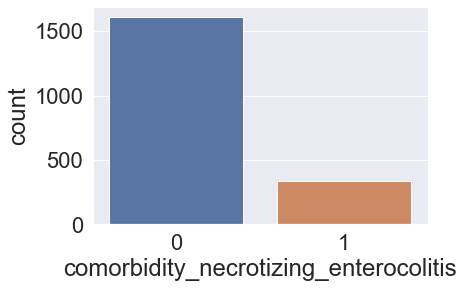

In [46]:
#  intestinal disease among premature infants
plt.figure(figsize=(6,4))
sns.countplot(data_clean['comorbidity_necrotizing_enterocolitis'])
print(data_clean.comorbidity_necrotizing_enterocolitis.value_counts())
plt.show()

**Race** 

1  American Indian or Alaska Native 

2  Asian 

3  Black or African American 

4  Native Hawaiian or Other Pacific Islander 

5  White 

6 Two or more races 

0  Unknown

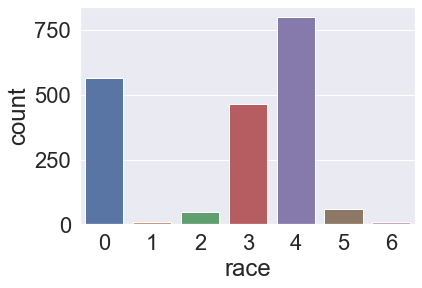

In [47]:
# Race column view
plt.figure(figsize=(6,4))
sns.countplot(data_clean['race'])
plt.show()

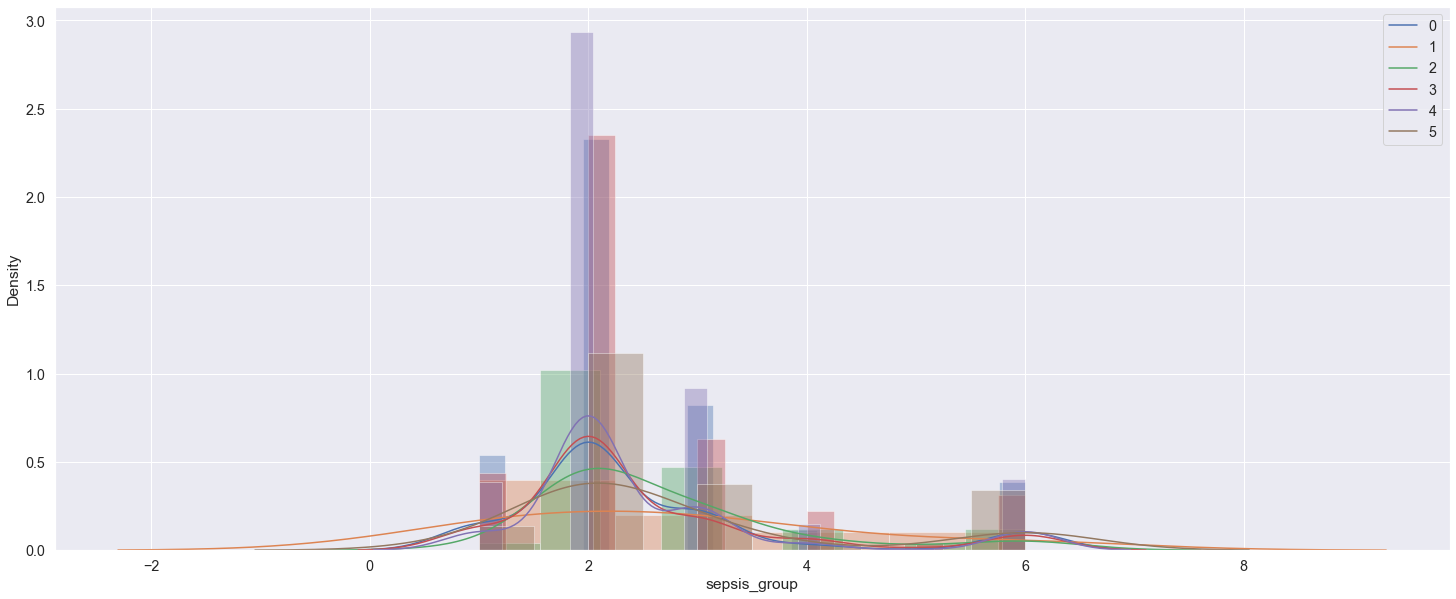

In [48]:
# Take a look at how Sepsis varies among race
plt.figure(figsize=(25,10))
sns.set(font_scale=1.3)
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==0])
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==1])
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==2])
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==3])
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==4])
sns.distplot(data_clean["sepsis_group"][data_clean["race"]==5])
plt.legend(['0','1','2','3','4','5'])
plt.show()

# Feature Selection

In [49]:
# Final summary statistics of data
data_clean.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
episode_id,1946.0,973.500000,561.906131,1.00,487.25,973.50,1459.75,1946.00
unique_patient_id,1946.0,491.026721,272.736848,1.00,264.00,481.50,730.75,986.00
sex,1946.0,0.576567,0.494230,0.00,0.00,1.00,1.00,1.00
race,1946.0,2.582220,1.742165,0.00,0.00,3.00,4.00,6.00
gestational_age_at_birth_weeks,1946.0,32.336095,5.321194,22.00,27.00,34.00,37.00,41.00
birth_weight_kg,1946.0,2.009187,1.105925,0.37,0.91,2.01,2.92,5.95
sepsis_group,1946.0,2.521583,1.263201,1.00,2.00,2.00,3.00,6.00
onset_age_in_days,1946.0,66.431655,70.165333,0.00,10.00,44.00,105.75,335.00
onset_hour_of_day,1946.0,10.560123,6.533421,0.00,5.00,10.00,16.00,23.00
blood_culture_positive,1946.0,0.065776,0.247954,0.00,0.00,0.00,0.00,1.00


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'episode_id'),
  Text(1.5, 0, 'unique_patient_id'),
  Text(2.5, 0, 'sex'),
  Text(3.5, 0, 'race'),
  Text(4.5, 0, 'gestational_age_at_birth_weeks'),
  Text(5.5, 0, 'birth_weight_kg'),
  Text(6.5, 0, 'sepsis_group'),
  Text(7.5, 0, 'onset_age_in_days'),
  Text(8.5, 0, 'onset_hour_of_day'),
  Text(9.5, 0, 'blood_culture_positive'),
  Text(10.5, 0, 'positive_days'),
  Text(11.5, 0, 'time_to_antibiotics'),
  Text(12.5, 0, 'stat_abx'),
  Text(13.5, 0, 'overall_mortality_within_7_days'),
  Text(14.5, 0, 'overall_mortality_within_14_days'),
  Text(15.5, 0, 'overall_mortality_within_30_days'),
  Text(16.5, 0, 'intubated_at_time_of_sepsis_evaluation'),
  Text(17.5, 0, 'intubated_free_days'),
  Text(18.5, 0, 'inotrope_at_time_of_sepsis_eval'),
  Text(19.5, 0, 'inotrope_fre

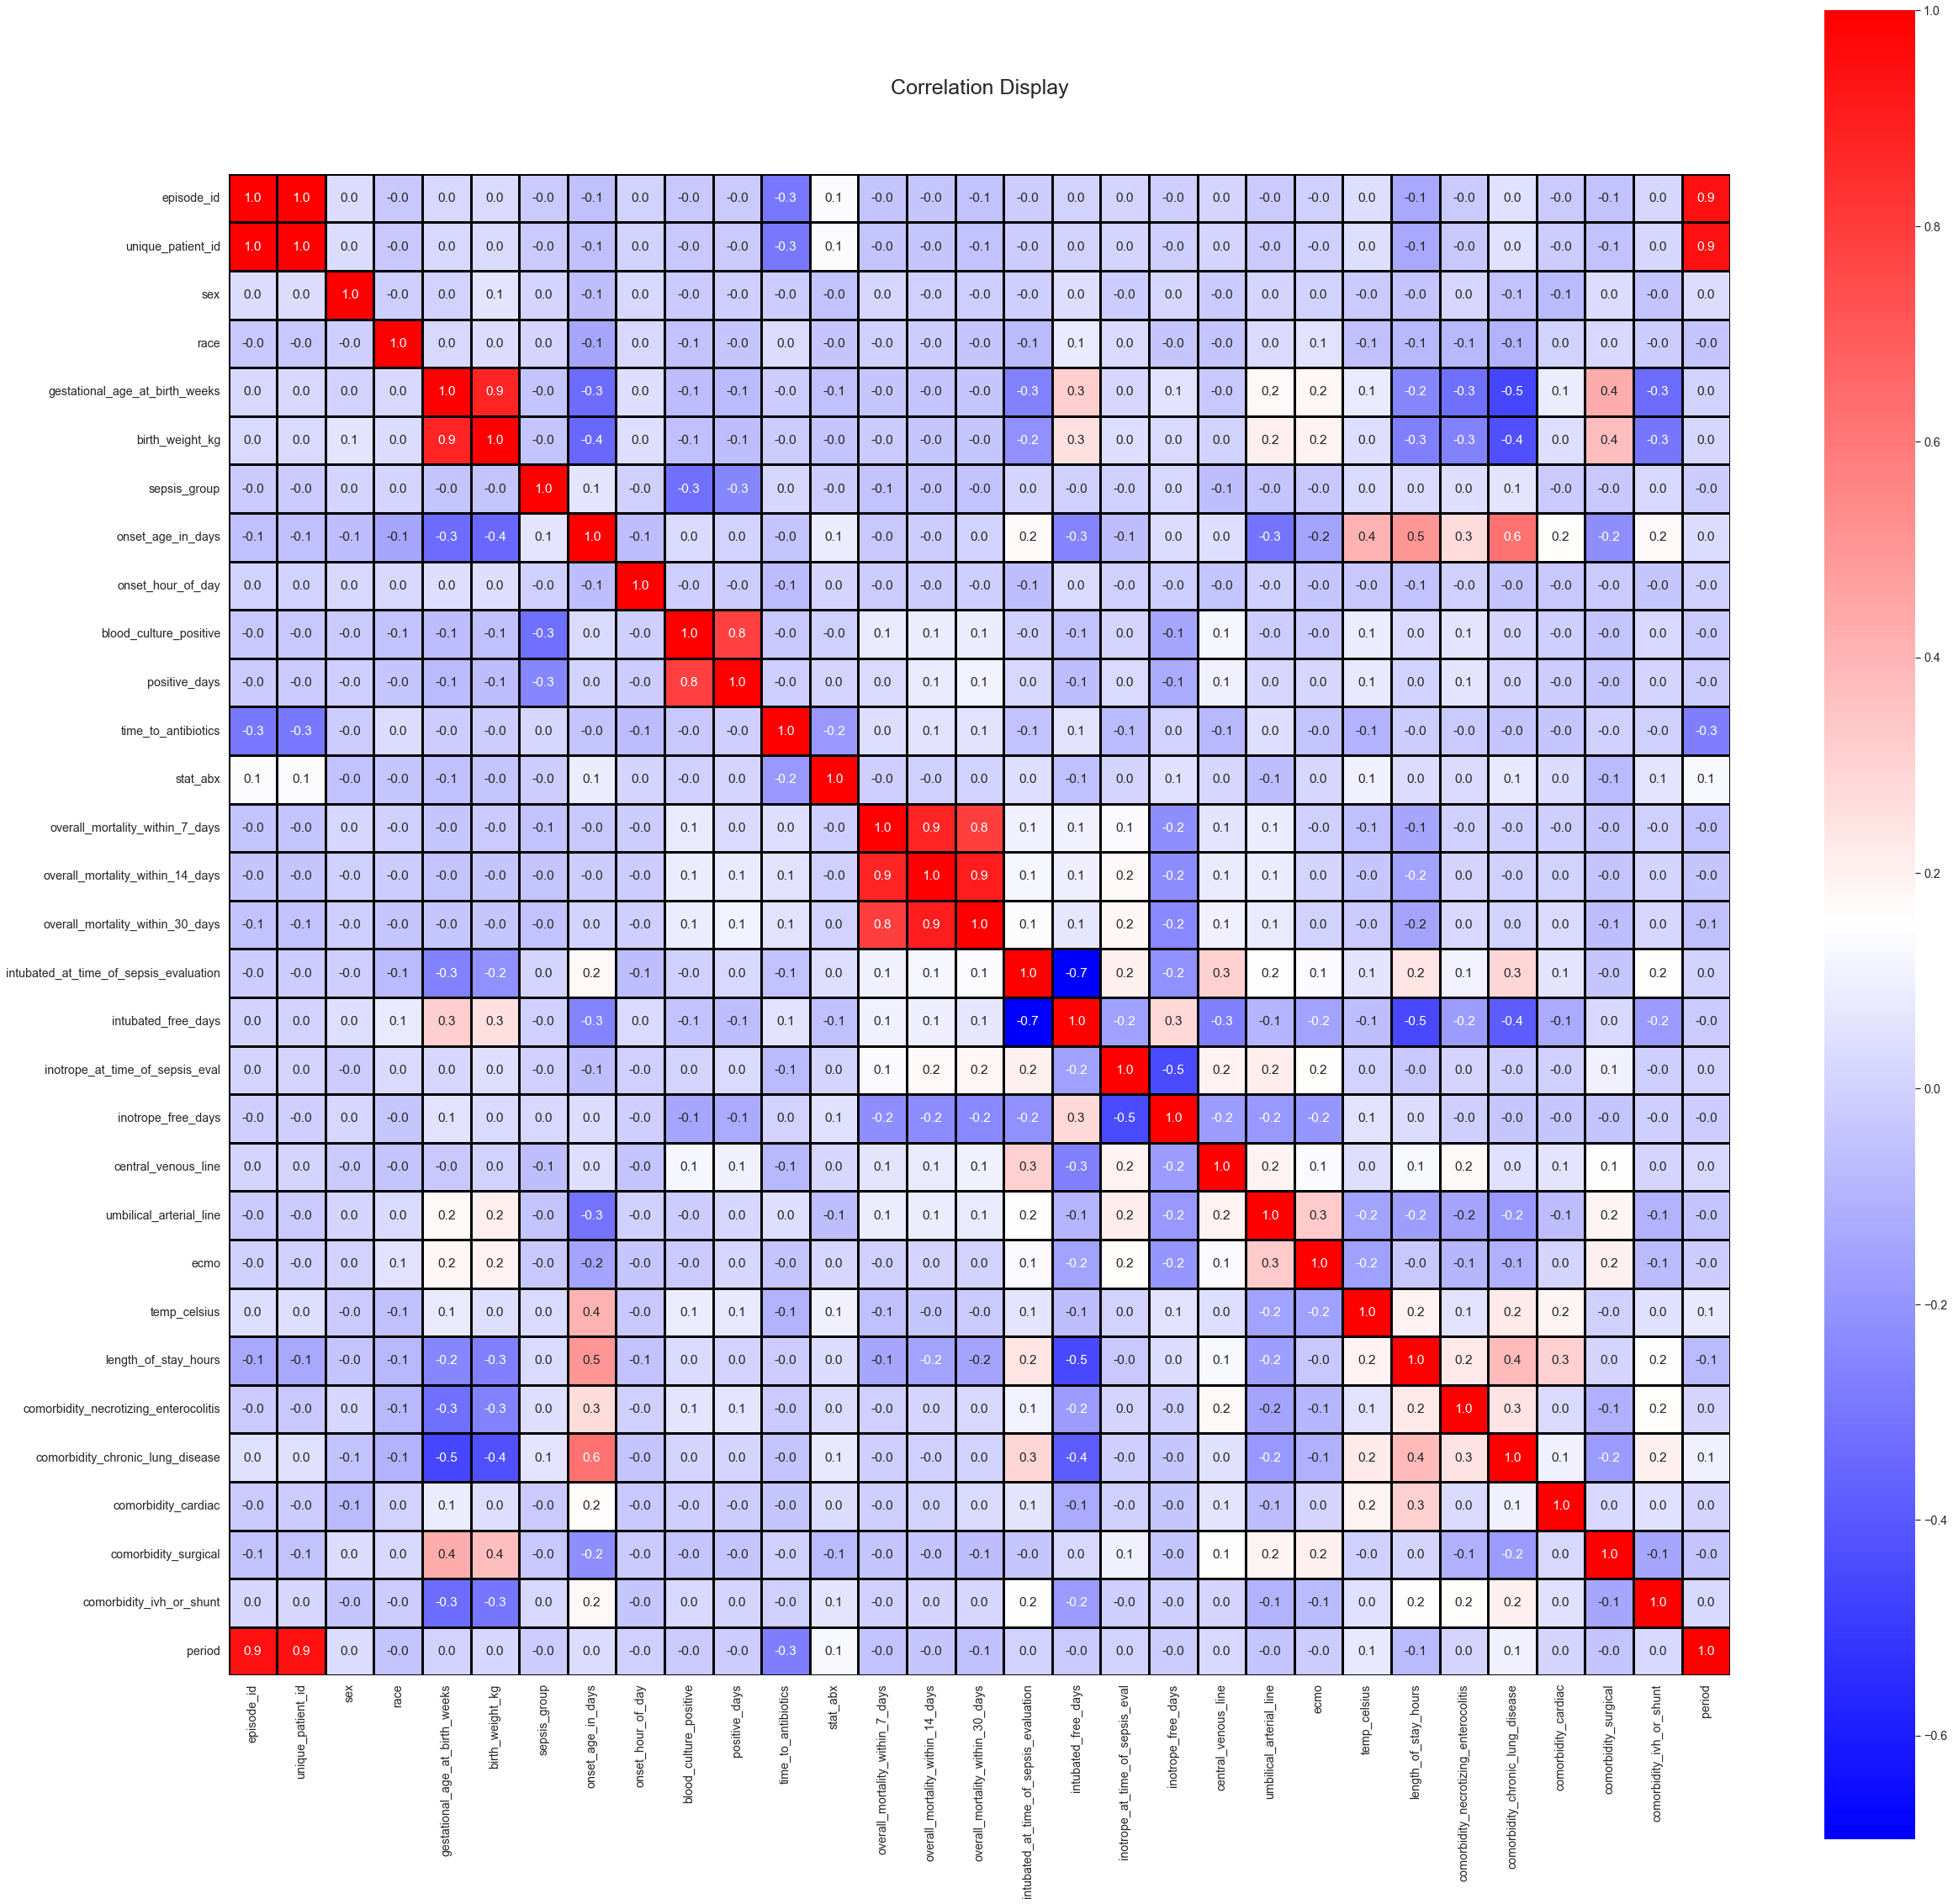

In [50]:
# Red = Maximum correlation
# Blue  = Minimum correlation

heatmap_correlation = data_clean.corr()
colormap = plt.cm.inferno
plt.figure(figsize=(40,40))
plt.title('Correlation Display', y = 1.05, size = 25)
sns.heatmap(data=heatmap_correlation, square = True, annot=True, cmap = "bwr", fmt='.1f', linewidths=3, linecolor='black')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [51]:
# Droping the maximum correlated values
data_clean = data_clean.drop('overall_mortality_within_7_days', axis=1) 
data_clean = data_clean.drop('overall_mortality_within_14_days', axis=1)

In [52]:
data_clean.shape

(1946, 29)

In [53]:
# Subsetting the data into dependent and independent variables. This will Seprate independent variable and target variable.
X = data_clean.drop('overall_mortality_within_30_days', axis=1)  # features
y = data_clean.overall_mortality_within_30_days # targets

In [54]:
X.shape

(1946, 28)

In [55]:
# Using SelectKBest class to view the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_sel = SelectKBest(score_func=chi2, k=20)
fit = best_sel .fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_sel  = pd.concat([columns,scores],axis=1)
feature_sel.columns = ['Features','Score']  #naming the dataframe columns
print(feature_sel.nlargest(20,'Score'))  # print 20 best features

                                  Features         Score
21                    length_of_stay_hours  91990.192164
0                               episode_id   1598.133338
1                        unique_patient_id    770.647795
11                     time_to_antibiotics    225.089377
14                     intubated_free_days    103.522503
16                      inotrope_free_days     72.582220
10                           positive_days     60.662212
15         inotrope_at_time_of_sepsis_eval     58.978666
9                   blood_culture_positive     15.264869
13  intubated_at_time_of_sepsis_evaluation     13.205715
18                 umbilical_arterial_line     11.313170
17                     central_venous_line      6.403218
25                    comorbidity_surgical      4.653824
27                                  period      4.012212
3                                     race      3.171954
6                             sepsis_group      2.818520
4           gestational_age_at_

[0.04037506 0.03766166 0.02188523 0.04238682 0.03762064 0.03941614
 0.03350222 0.04608852 0.04527958 0.02037585 0.01749044 0.04780746
 0.01153038 0.02235848 0.11002231 0.03930821 0.0985805  0.01475478
 0.01621643 0.00728163 0.05188231 0.0794802  0.013535   0.01490274
 0.02377438 0.02227184 0.01737169 0.02683949]


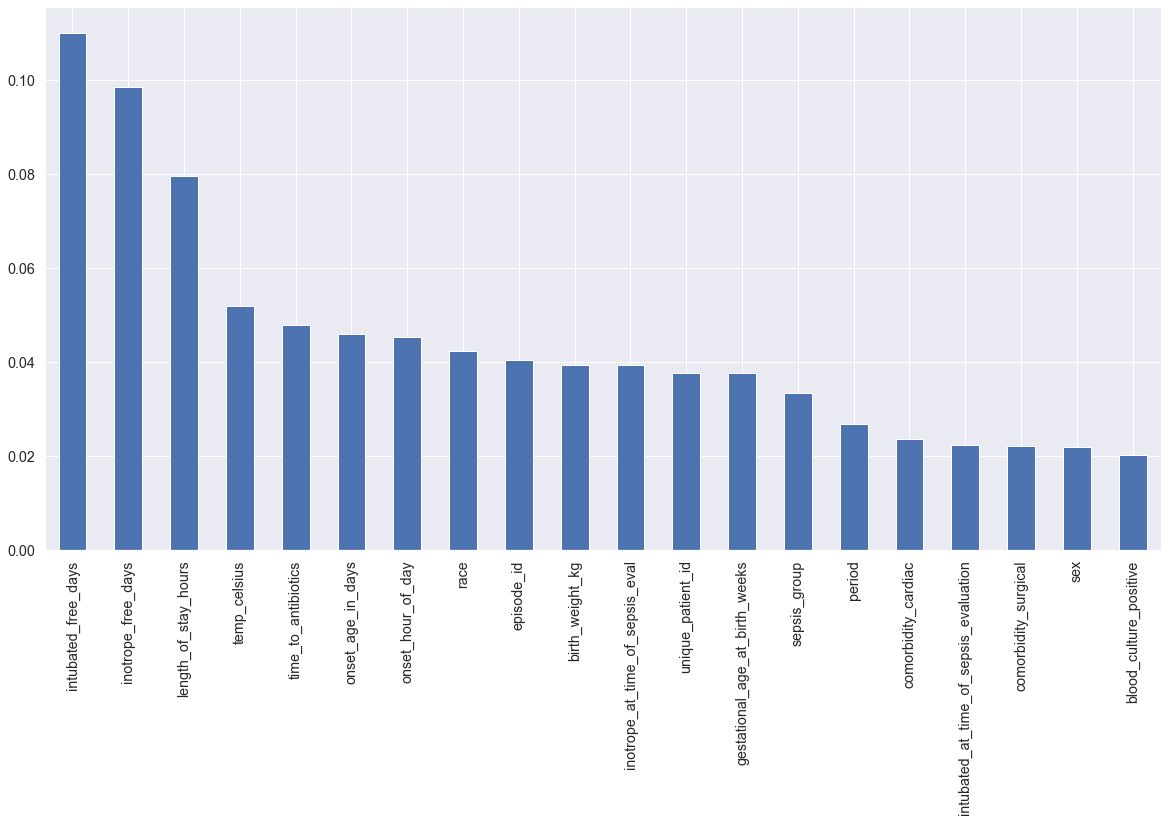

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X,y)
print(ETC.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ETC.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='bar', figsize = (20,10))
plt.show()

In [57]:
# The best features 
X = data_clean[['intubated_free_days','inotrope_free_days','length_of_stay_hours','temp_celsius','onset_age_in_days','episode_id',   
                'time_to_antibiotics','onset_hour_of_day', 'race', 'unique_patient_id','birth_weight_kg','inotrope_at_time_of_sepsis_eval','gestational_age_at_birth_weeks',
                'sepsis_group','period','intubated_at_time_of_sepsis_evaluation','comorbidity_surgical', 'sex','blood_culture_positive',
                'positive_days', 'umbilical_arterial_line']] 

In [58]:
pd.set_option("display.max_columns", None)
X

,intubated_free_days,inotrope_free_days,length_of_stay_hours,temp_celsius,onset_age_in_days,episode_id,time_to_antibiotics,onset_hour_of_day,race,unique_patient_id,birth_weight_kg,inotrope_at_time_of_sepsis_eval,gestational_age_at_birth_weeks,sepsis_group,period,intubated_at_time_of_sepsis_evaluation,comorbidity_surgical,sex,blood_culture_positive,positive_days,umbilical_arterial_line
0,0,0,216.0,37.6,7,1,393,9,3,1,0.40,0,23.0,1,0,1,0,0,1,6,1
1,4,23,578.0,36.8,0,2,33,4,4,2,0.79,0,27.0,3,0,1,0,0,0,0,1
2,0,0,578.0,36.9,23,3,126,9,4,2,0.79,1,27.0,1,0,1,0,0,1,1,0
3,0,0,285.0,37.2,11,4,134,22,4,3,4.31,0,37.0,1,0,1,0,0,1,1,1
4,12,28,783.0,36.2,3,5,130,17,4,4,4.17,0,39.0,2,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,28,28,2237.5,38.2,6,1942,60,15,3,982,2.78,0,37.0,2,3,0,1,1,0,0,0
1942,17,28,2237.5,37.7,5,1943,43,2,4,983,2.88,0,37.0,2,3,1,1,1,0,0,0
1943,11,28,2237.5,35.9,0,1944,6,11,0,984,2.56,0,38.0,2,3,1,0,1,0,0,1
1944,0,24,2237.5,36.9,20,1945,29,12,4,985,1.70,0,30.0,1,3,1,0,1,1,1,0


In [59]:
X.shape

(1946, 21)

In [60]:
y.shape

(1946,)

In [61]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
intubated_free_days,1946.0,13.759507,11.907645,0.00,0.00,14.00,27.00,28.00
inotrope_free_days,1946.0,26.562179,4.118113,0.00,28.00,28.00,28.00,28.00
length_of_stay_hours,1946.0,3022.250514,2481.091822,2.00,1102.50,2237.50,4394.00,9720.50
temp_celsius,1946.0,37.527441,0.750573,33.70,37.00,37.30,38.00,41.30
onset_age_in_days,1946.0,66.431655,70.165333,0.00,10.00,44.00,105.75,335.00
episode_id,1946.0,973.500000,561.906131,1.00,487.25,973.50,1459.75,1946.00
time_to_antibiotics,1946.0,84.313977,54.669745,3.00,49.25,68.00,102.00,502.00
onset_hour_of_day,1946.0,10.560123,6.533421,0.00,5.00,10.00,16.00,23.00
race,1946.0,2.582220,1.742165,0.00,0.00,3.00,4.00,6.00
unique_patient_id,1946.0,491.026721,272.736848,1.00,264.00,481.50,730.75,986.00


In [62]:
y.describe().T

count    1946.000000
mean        0.049846
std         0.217682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: overall_mortality_within_30_days, dtype: float64

#  Machine learning models

In [63]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [64]:
# Scaling the Dataset using the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Viewing the shape of the scaled data.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1556, 21) (390, 21) (1556,) (390,)


In [66]:
# Data training set
print('Train data: ',round(len(X_train)/len(X), 2))

# Data testing set
print('Test data: ', round(X_test.shape[0]/y.shape[0], 2))

Train data:  0.8
Test data:  0.2


#  Logistic Regression

In [67]:
# Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)

In [68]:
%%time

log_reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 14 ms


LogisticRegression(random_state=42)

In [69]:
%%time

log_reg_pred = log_reg.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [70]:
print("Logistic Regression Accuracy is: {}%".format(round(metrics.accuracy_score(y_test, log_reg_pred, 
                                                                        normalize=True,sample_weight=None)*100,2)))

print("Logistic Regression Mean Squared Error is: ", round(mean_squared_error(log_reg_pred, y_test), 4))

Logistic Regression Accuracy is: 94.1%
Logistic Regression Mean Squared Error is:  0.059


In [71]:
LR_F1_Score          =  f1_score(y_test, log_reg_pred, average='macro')
LR_Precision_score   =  metrics.precision_score(y_test, log_reg_pred, average='macro')
LR_Recall_score      =  metrics.recall_score(y_test, log_reg_pred, average='macro')

In [72]:
print('F1 score: %f' % LR_F1_Score  )
print('Precision: %f' % LR_Precision_score)
print('Recall: %f' % LR_Recall_score)

F1 score: 0.655992
Precision: 0.847513
Recall: 0.608356


In [73]:
log_reg_matrix = confusion_matrix(y_test, log_reg_pred)

In [74]:
print(log_reg_matrix)
print(classification_report(y_test,log_reg_pred)) 

[[361   2]
 [ 21   6]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       363
           1       0.75      0.22      0.34        27

    accuracy                           0.94       390
   macro avg       0.85      0.61      0.66       390
weighted avg       0.93      0.94      0.93       390



<AxesSubplot:>

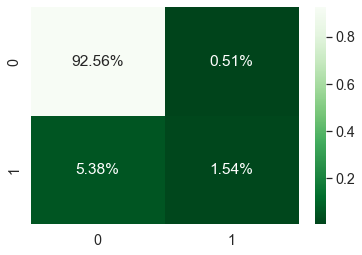

In [75]:
sns.heatmap(log_reg_matrix /np.sum(log_reg_matrix), annot=True, 
            fmt='.2%', cmap='Greens_r')

<AxesSubplot:>

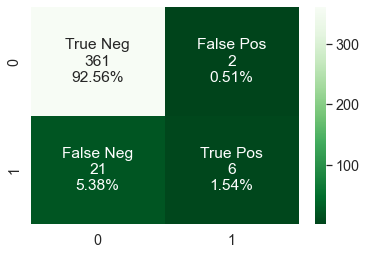

In [76]:
groups = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(num) for num in
                log_reg_matrix.flatten()]
percentages = ["{0:.2%}".format(num) for num in
                     log_reg_matrix.flatten()/np.sum(log_reg_matrix)]
labels = [f"{a1}\n{a2}\n{a3}" for a1, a2, a3 in
          zip(groups,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_reg_matrix, annot=labels, fmt='', cmap='Greens_r')

# Saving the Model

In [77]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(log_reg, open("model.pkl", "wb"))
 

In [78]:
loaded_model = joblib.load(open("model.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.941025641025641

**Putting data points in the model will either return 0 or 1 i.e. person suffering from Sepsis or not.**

In [79]:
log_reg.predict([[0,0,216.0, 37.6, 7, 1, 393, 9, 3, 1, 0.40, 0, 23.0, 1, 0, 1, 0, 0, 1, 6, 1]]) # 1st patient

array([0], dtype=int64)